In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import  EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import argparse

In [2]:
df = pd.read_csv("D:/!Рабочая/5 курс 1 семестр/Инт анализ данных/train.csv",sep=",")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
willOneHotEncode = ["satisfaction", "Customer Type", "Type of Travel","Class"]
for item in willOneHotEncode:
    df = pd.concat([df,pd.get_dummies(df[item],prefix=item)],axis=1)
    df = df.drop(columns=[item])
df.head()

,Unnamed: 0,id,Gender,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Arrival Delay in Minutes,satisfaction_neutral or dissatisfied,satisfaction_satisfied,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0,70172,Male,13,460,3,4,3,1,5,...,18.0,1,0,1,0,0,1,0,0,1
1,1,5047,Male,25,235,3,2,3,3,1,...,6.0,1,0,0,1,1,0,1,0,0
2,2,110028,Female,26,1142,2,2,2,2,5,...,0.0,0,1,1,0,1,0,1,0,0
3,3,24026,Female,25,562,2,5,5,5,2,...,9.0,1,0,1,0,1,0,1,0,0
4,4,119299,Male,61,214,3,3,3,3,4,...,0.0,0,1,1,0,1,0,1,0,0


In [4]:
df = df.drop('Gender', axis=1)
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('id', axis=1)
df = df.drop('Gate location', axis=1)
df = df.drop('Departure Delay in Minutes', axis=1)
df = df.drop('Departure/Arrival time convenient', axis=1)
df = df.drop('Arrival Delay in Minutes', axis=1)
df = df.drop('satisfaction_neutral or dissatisfied', axis=1)

mm = MinMaxScaler()
df_encoded= pd.DataFrame(mm.fit_transform(df))
df_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.076923,0.086632,0.6,0.6,1.0,0.6,1.0,1.0,0.8,0.6,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.230769,0.041195,0.6,0.6,0.2,0.6,0.2,0.2,0.2,1.0,...,0.8,0.2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.243590,0.224354,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,...,0.8,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.230769,0.107229,0.4,1.0,0.4,0.4,0.4,0.4,0.4,1.0,...,0.8,0.4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.692308,0.036955,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,...,0.6,0.6,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [5]:
x = df_encoded
y = pd.DataFrame (df['satisfaction_satisfied'], columns=['satisfaction_satisfied'])

In [7]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size = 0.33)
yTrain = pd.get_dummies(data=yTrain,columns =['satisfaction_satisfied'])
yTest = pd.get_dummies(data=yTest,columns =['satisfaction_satisfied'])

In [16]:
model_nn = keras.Sequential([keras.layers.Dense(4,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(8,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(10,kernel_initializer = 'he_uniform',activation = 'relu'),
                            keras.layers.Dense(2,kernel_initializer = 'glorot_uniform',activation = 'sigmoid'),
                            keras.layers.Dropout(0.35)
                            ])

es = EarlyStopping(patience=3,restore_best_weights= True)

model_nn.compile(loss = "binary_crossentropy",metrics = ['accuracy'],optimizer = 'Adam')
history = model_nn.fit(xTrain,yTrain,validation_data = (xTest,yTest),epochs = 40,callbacks = es)

Epoch 1/40

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

2176/2176 [==============================] - 2s 881us/step - loss: 2.7851 - accuracy: 0.6972 - val_loss: 0.0180 - val_accuracy: 1.0000
Epoch 2/40
2176/2176 [==============================] - 2s 805us/step - loss: 2.7036 - accuracy: 0.7172 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 3/40
2176/2176 [==============================] - 2s 801us/step - loss: 2.7310 - accuracy: 0.7172 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 4/40
2176/2176 [==============================] - 2s 796us/step 

1072/1072 [==============================] - 0s 446us/step - loss: 6.4690e-04 - accuracy: 1.0000
test_accuracy: 1.0


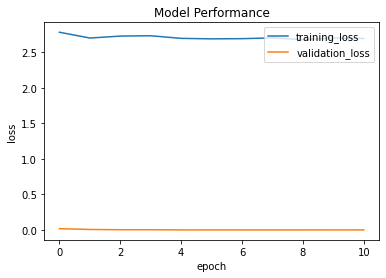

In [17]:
test_loss,test_acc= model_nn.evaluate(xTest,yTest)
print("test_accuracy:",test_acc)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'], loc='upper right')
plt.show()